In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
print(sys.version)
print(pd.__version__)
print(np.__version__)

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
2.2.1
1.26.4


In [3]:
xml_files_dir = '/home/sogaksa123/AIFFEL_THON/data/dataset3/xml_files/'
png_files_dir = '/home/sogaksa123/AIFFEL_THON/data/dataset3/png_files/'


### Review Data

In [10]:
# This is a label from the annotation folder. This label is .xml format.
sample_xml = xml_files_dir+'107_2b3_Ar_mc_AKGC417L_1.xml'
with open(sample_xml) as f:
    contents = f.read()
    print(contents)


<?xml version="1.0" ?>
<annotation>
    <folder>data3</folder>
    <filename>107_2b3_Ar_mc_AKGC417L_1.png</filename>
    <path>/content/drive/MyDrive/aiffel/AIFFELthon/1_data/data3/107_2b3_Ar_mc_AKGC417L_1.png</path>
    <source>
        <database>ICBHI</database>
    </source>
    <size>
        <width>224</width>
        <height>224</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>crckles</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>0</xmin>
            <ymin>220</ymin>
            <xmax>30</xmax>
            <ymax>209</ymax>
        </bndbox>
    </object>
    <object>
        <name>crckles</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>30</xmin>
            <ymin>220</ymin>
            <xmax>113</xmax>
            <ymax>209</ymax>
        </bn

### Preparing Data For Model(YoloV9)

#### Translate '.xml" format to ".txt" format

# Data Loading

In [18]:
# The functions are about translating label data.
def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = (((h-bbox[3]) + (h-bbox[1])) / 2 ) / h # y

    width = (bbox[2] - bbox[0]) / w
    height = ((h-bbox[3]) - (h-bbox[1])) / h # y

    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center, width, height
    w_half_len = (bbox[2] + w) / 2
    h_half_len = (bbox[3] + h) / 2

    xmin = int((bbox[0] + w) - w_half_len)
    ymin = int((bbox[1] + h) - h_half_len)
    xmax = int((bbox[0] + w) + w_half_len)
    ymax = int((bbox[1] + h) + h_half_len)

    return [xmin, ymin, xmax, ymax]

In [5]:
tmp_root = '/home/sogaksa123/AIFFEL_THON/'

In [19]:
# Create .txt label data.
classes = []

input_dir = tmp_root+"data/dataset3/xml_files"
output_dir = tmp_root+"model/Yolov9_ver3/labels"
image_dir = tmp_root+"data/dataset3/png_files"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

files = glob.glob(os.path.join(input_dir, "*.xml"))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist")
        continue

    result = []

    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall("object"):
        label = obj.find("name").text

        if label not in classes:
            classes.append(label)

        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:

        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))

with open(f"{output_dir}/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

In [20]:
# Labels
with open(f"{output_dir}/classes.txt") as f:
    contents = f.read()
    print(contents)

["crckles", "wheezes", "normal"]


In [21]:
classes

['crckles', 'wheezes', 'normal']

In [45]:
# .xml format
with open("/home/sogaksa123/AIFFEL_THON/data/dataset3/xml_files/160_1b2_Tc_mc_AKGC417L_2.xml") as f:
    contents = f.read()
    print(contents)

#  160_1b2_Ar_mc_AKGC417L_2
#  160_1b2_Al_mc_AKGC417L_2
#  160_1b2_Pl_mc_AKGC417L_2
#  160_1b2_Lr_mc_AKGC417L_2
# 160_1b2_Pr_mc_AKGC417L_2
# 160_1b2_Tc_mc_AKGC417L_2

<?xml version="1.0" ?>
<annotation>
    <folder>data3</folder>
    <filename>160_1b2_Tc_mc_AKGC417L_2.png</filename>
    <path>/content/drive/MyDrive/aiffel/AIFFELthon/1_data/data3/160_1b2_Tc_mc_AKGC417L_2.png</path>
    <source>
        <database>ICBHI</database>
    </source>
    <size>
        <width>224</width>
        <height>224</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>wheezes</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>0</xmin>
            <ymin>209</ymin>
            <xmax>-117</xmax>
            <ymax>134</ymax>
        </bndbox>
    </object>
</annotation>



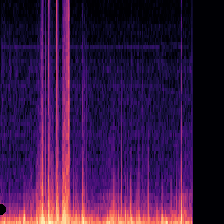

In [50]:
from PIL import Image, ImageDraw
image_path = '/home/sogaksa123/AIFFEL_THON/data/dataset3/png_files/160_1b2_Tc_mc_AKGC417L_2.png'

image = Image.open(image_path)

# 이미지에 그릴 좌표
x_min, y_min = 0, 209
x_max, y_max = -117, 134

# 그리기 객체 생성
draw = ImageDraw.Draw(image)

# 점 그리기
point_size = 5

# 점 그리기
draw.ellipse([(x_min-point_size, y_min-point_size), (x_min+point_size, y_min+point_size)], fill='black')
draw.ellipse([(x_max-point_size, y_max-point_size), (x_max+point_size, y_max+point_size)], fill='black')

# 이미지 보기
image.show()


In [23]:
# .txt format
with open("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/labels/103_2b2_Ar_mc_LittC2SE_0.txt") as f:
    contents = f.read()
    print(contents)

1 0.25892857142857145 0.234375 0.4107142857142857 0.33482142857142855
1 0.9732142857142857 0.234375 0.05357142857142857 0.33482142857142855
2 0.7053571428571429 0.04241071428571429 0.48214285714285715 0.049107142857142856


In [24]:
annotation_count = len(os.listdir(input_dir))
labels_count = len(os.listdir(output_dir))
print(f"Annotation Counts: {annotation_count}")
print(f"Lables Counts: {labels_count}")

Annotation Counts: 2984
Lables Counts: 2985


### Preparing Training Data

In [ ]:
root = '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data'
os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3')
os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training')
os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data')


In [26]:
# Create a folder of train dataset

if not os.path.isfile("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data"):
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/images')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/labels')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/labels')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/images')
    os.mkdir('/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/labels')

FileExistsError: [Errno 17] File exists: '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train'

In [28]:
# Material is the names of images in the images folder.
metarial = []
for i in sorted(os.listdir("/home/sogaksa123/AIFFEL_THON/data/dataset3/png_files")):
    string = i[:-4]
    metarial.append(string)

In [29]:
metarial[0:10]

['101_1b1_Al_sc_Meditron_0',
 '101_1b1_Al_sc_Meditron_1',
 '101_1b1_Al_sc_Meditron_2',
 '101_1b1_Pr_sc_Meditron_0',
 '101_1b1_Pr_sc_Meditron_1',
 '101_1b1_Pr_sc_Meditron_2',
 '102_1b1_Ar_sc_Meditron_0',
 '102_1b1_Ar_sc_Meditron_1',
 '102_1b1_Ar_sc_Meditron_2',
 '103_2b2_Ar_mc_LittC2SE_0']

In [30]:
print("Sum of image: ", len(metarial))
train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = int(len(metarial) * 0.15)
print("Sum of the train size: ", train_size)
print("Sum of the test size: ", test_size)
print("Sum of the val size: ", val_size)

Sum of image:  2984
Sum of the train size:  2088
Sum of the test size:  447
Sum of the val size:  447


# Data Split

In [33]:
import os
import shutil

def preparingdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    for i in range(0, train_size):
        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"

        mstring = metarial[i]
        train_destination_txt = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/labels" + "/" + metarial[i] + ".txt"
        train_destination_png = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/images" + "/" + metarial[i] + ".png"

        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)

    for l in range(train_size , train_size + test_size):
        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"

        mstring = metarial[l]
        test_destination_txt = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images" + "/" + metarial[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)

    for n in range(train_size + test_size , train_size + test_size + val_size):
        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"

        mstring = metarial[n]
        val_destination_txt = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/images" + "/" + metarial[n] + ".png"

        # Remove _mel_spec from the filename
        new_filename = metarial[n]

        # Copy files with modified filename
        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png.replace(metarial[n], new_filename))


In [34]:
#preparinbdata("/kaggle/working/labels", "/kaggle/input/face-mask-detection/images", 603, 150, 100)

preparingdata(main_txt_file = "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/labels",
              main_img_file = "/home/sogaksa123/AIFFEL_THON/data/dataset3/png_files",
              train_size = train_size,
              test_size = test_size,
              val_size = val_size)

In [35]:
train_data = len(os.listdir("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/images"))
val_data = len(os.listdir("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/images"))
test_data = len(os.listdir("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images"))

print(f"train_data: {train_data}")
print(f"val_data: {val_data}")
print(f"test_data: {test_data}")

train_data: 2088
val_data: 447
test_data: 448


###yaml 파일 제작

In [36]:
# Create the data.yaml. I am going to use it on the train with yolov9.
yaml_text = """train: /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/images/
val: /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/images

nc: 3
names: ["crackles", "wheezes", "normal"]"""

with open("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/data.yaml", 'w') as file:
    file.write(yaml_text)

In [37]:
with open("/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/data.yaml") as f:
    contents = f.read()
    print(contents)

train: /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/images/
val: /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/val/images

nc: 3
names: ["crackles", "wheezes", "normal"]


## YoloV9
---

In [38]:
# Download Github rep.
!git clone https://github.com/SkalskiP/yolov9.git

fatal: destination path 'yolov9' already exists and is not an empty directory.


In [40]:
# İnstall the req.
!pip install -r /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/requirements.txt -q

In [41]:
import torch

In [42]:
!nvidia-smi

Fri Mar 29 09:03:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   46C    P0              27W /  72W |      0MiB / 23034MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"현재 device는 {device} 입니다.")

현재 device는 cuda 입니다.


### Training

In [1]:
# Train with YoloV9
"""
workers --> max dataloader workers (per RANK in DDP mode)
device --> cuda device, i.e. 0 or 0,1,2,3 or cpu
batch --> total batch size for all GPUs, -1 for autobatch
epochs --> total training epochs
data --> dataset.yaml path
img --> train, val image size (pixels)
cfg --> model.yaml path
weights --> initial weights path
name --> save to project/name
hyp --> hyperparameters path

**This parameters is my project parameters. You can make changes for your project.**
"""

'''
x
--workers 8 --device cpu --batch 16 --epochs 50 --min-items 0 --close-mosaic 15\
o
--workers 1 --device cpu --batch 16 --epochs 5 --min-items 0 --close-mosaic 15\
'''
!python /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/train_dual.py \
--workers 4 --device 0 --batch 16 --epochs 30 --min-items 0 --close-mosaic 15\
--data /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/data.yaml \
--img 224 --cfg /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/models/detect/yolov9-c.yaml \
--weights '' --name yolov9-c --hyp /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/data/hyps/hyp.scratch-high.yaml

train_dual: weights=, cfg=/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/models/detect/yolov9-c.yaml, data=/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/data.yaml, hyp=/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=30, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=yolov9/runs/train, name=yolov9-c, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22491MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmu

In [47]:
print('Done!')

Done!


In [33]:
# 결과 시각화
!python /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/detect.py

detect: weights=yolov9/yolo.pt, source=yolov9/data/images, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22491MiB)

Traceback (most recent call last):
  File "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/home/sogaksa123/anaconda3/envs/sogaksa/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/home/sogaksa123/

In [3]:
file_path = '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/train/labels/160_1b2_Al_mc_AKGC417L_2.txt'

with open(file_path, 'r') as file:
    data = file.read()

print(data)

0 -0.2611607142857143 0.04241071428571429 -0.5223214285714286 0.049107142857142856
1 -0.2611607142857143 0.234375 -0.5223214285714286 0.33482142857142855


In [38]:
!python detect.py --source '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images/198_1b5_Pl_mc_AKGC417L_2.png' --img 224 --device 0 --weights '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/runs/train/yolov9-c3/weights/best.pt' --name yolov9_c_c_640_detect

detect: weights=['/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9/runs/train/yolov9-c3/weights/best.pt'], source=/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images/198_1b5_Pl_mc_AKGC417L_2.png, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_c_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22491MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50963250 parameters, 0 gradients, 237.7 GFLOPs
image 1/1 /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images/198_1b5_Pl_mc_AKGC417L_2.png: 224x224 (no detections), 27.3ms
Speed: 0.3ms pre-process, 27.3ms inference, 

In [ ]:
AIFFEL_THON/model/Yolov9_ver3/yolov9/runs/train/yolov9-c3/weights/best.pt

In [ ]:
AIFFEL_THON/model/Yolov9_ver3/yolov9/detect.py

In [ ]:
AIFFEL_THON/model/Yolov9_ver3/Training/data/test/images/198_1b5_Pl_mc_AKGC417L_2.png

In [35]:
import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: /home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3


In [36]:
import os

# 변경하고자 하는 디렉토리 경로
new_directory = '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver3/yolov9'

# 디렉토리 변경
os.chdir(new_directory)